In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/jasrlp/helpers.py'>

In [3]:
env = gym.make('Walker2d-v2')
learner = rltrain.DDPG(env, gamma=0.99, net_args={'hidden_dims': [64,64]}, lr=3e-4)
learner.show_loss_every = 1000
learner.minibatch_size = 128
learner.minimum_transitions_in_replay = 1000
learner.rollout_max_iter = 1000
viz = helpers.GenericViz(learner)

Actor (mu): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=6, bias=True)
    (5): Tanh()
  )
)
Critic (Q): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


Replay Buffer has 110 transitions


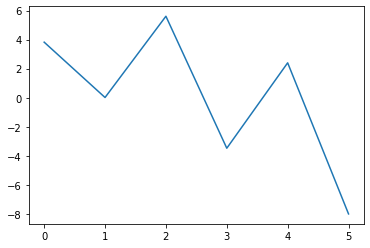

Replay Buffer has 588 transitions


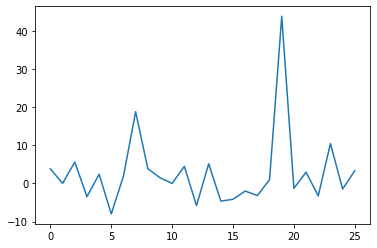

Replay Buffer has 995 transitions


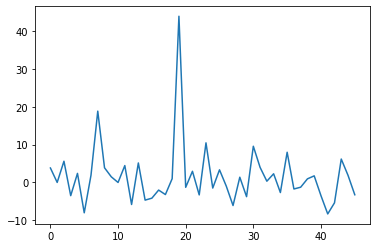

Replay Buffer has 1371 transitions


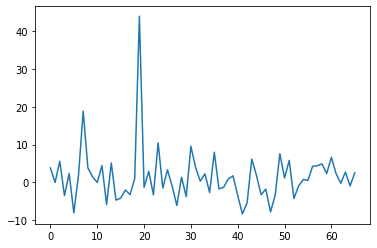

Replay Buffer has 1726 transitions


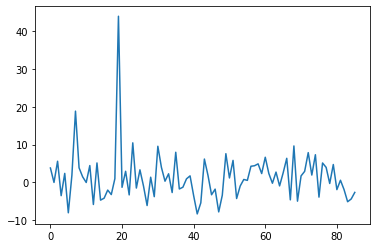

Critic Loss = 0.01159.  Mu loss = -0.90442



In [4]:
learner.eps = 1
for i in tqdm(range(100), "random warmup"):
    learner.rollout()
    if i % 20 == 5:
        print(f"Replay Buffer has {len(learner._replay)} transitions")
        viz.plot_q()

In [5]:
def eps_range(N:int=10, start:float=0.99, end:float=0.01, exp:float=1.0) -> list:
    start1 = start ** (1/exp)
    end1 = end ** (1/exp)
    change = end1-start1
    current = start1
    for i in range(N):
        eps = current ** exp
        print(f"\n\nEps = {eps:.3f} on {i+1} of {N}")
        yield eps
        current += (change)/(N-1)
        



Eps = 0.900 on 1 of 10


/Users/leodirac/dev/jasrlp/rldqn.py:153: UserWarning: calc_qval_batch can usually be replaced with just forward()
  warnings.warn("calc_qval_batch can usually be replaced with just forward()")


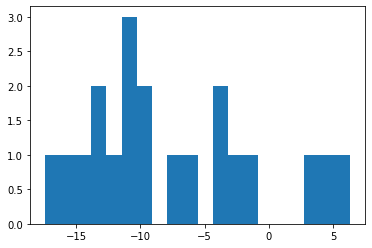

Reward mean,std = -7.596 +/- 6.610


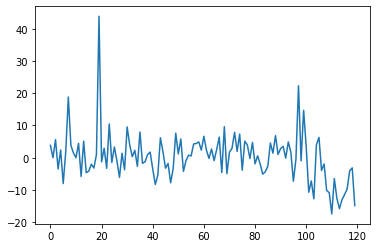



Eps = 0.761 on 2 of 10


Critic Loss = 0.03112.  Mu loss = -1.26523



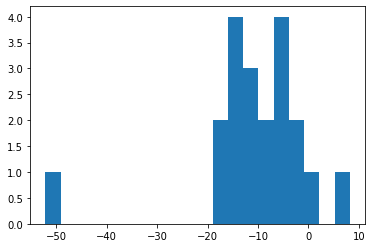

Reward mean,std = -10.387 +/- 11.416


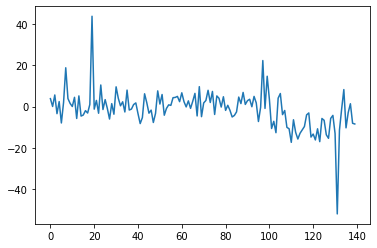



Eps = 0.631 on 3 of 10


Critic Loss = 0.06907.  Mu loss = -1.20198



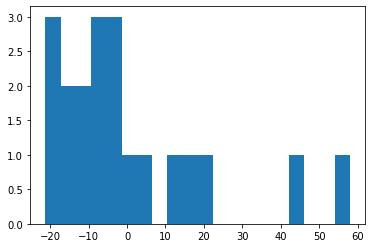

Reward mean,std = 0.634 +/- 20.078


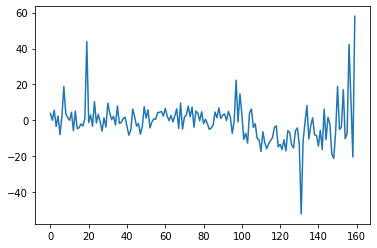



Eps = 0.508 on 4 of 10


Critic Loss = 0.12125.  Mu loss = -1.72702
Critic Loss = 0.15044.  Mu loss = -2.52811



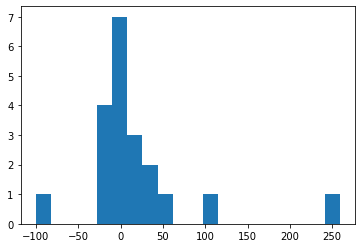

Reward mean,std = 18.352 +/- 66.435


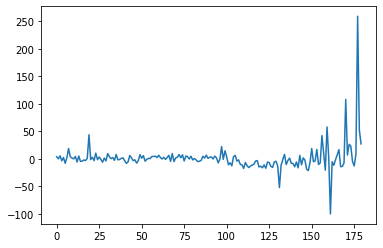



Eps = 0.395 on 5 of 10


Critic Loss = 0.22247.  Mu loss = -4.00985
Critic Loss = 0.37869.  Mu loss = -4.94617
Critic Loss = 0.33943.  Mu loss = -5.46569



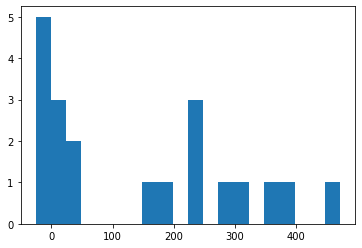

Reward mean,std = 145.748 +/- 156.054


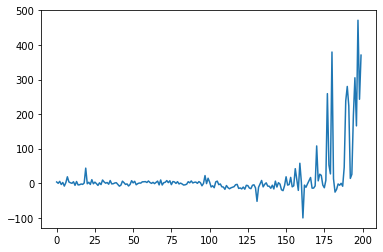



Eps = 0.292 on 6 of 10


Critic Loss = 0.47144.  Mu loss = -7.28986
Critic Loss = 0.27113.  Mu loss = -11.06480
Critic Loss = 0.45635.  Mu loss = -11.56364
Critic Loss = 0.49574.  Mu loss = -13.95105



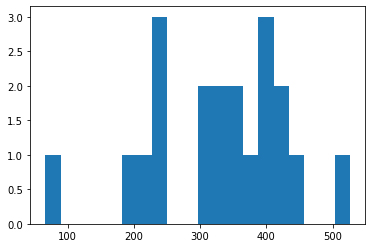

Reward mean,std = 330.339 +/- 102.335


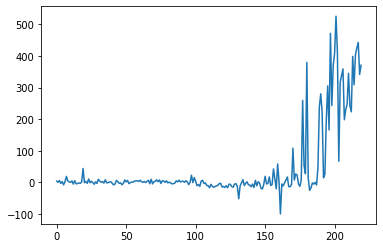



Eps = 0.200 on 7 of 10


Critic Loss = 0.41345.  Mu loss = -17.64915
Critic Loss = 0.96292.  Mu loss = -16.80526
Critic Loss = 0.39547.  Mu loss = -19.81693
Critic Loss = 0.65871.  Mu loss = -21.77234



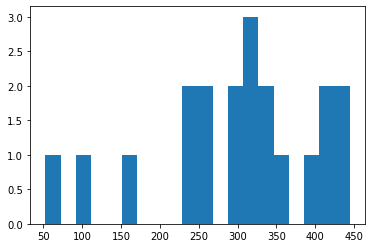

Reward mean,std = 299.891 +/- 102.659


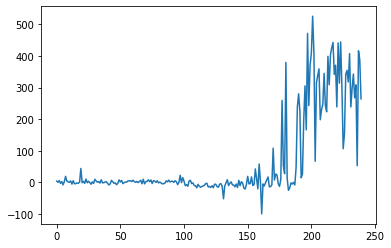



Eps = 0.120 on 8 of 10


Critic Loss = 0.45042.  Mu loss = -22.77105
Critic Loss = 0.80890.  Mu loss = -24.74851
Critic Loss = 1.12633.  Mu loss = -26.95306
Critic Loss = 0.82245.  Mu loss = -28.74367



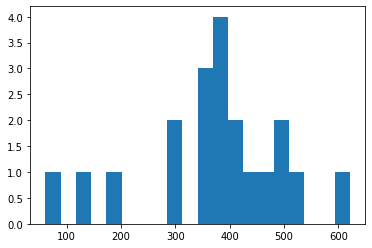

Reward mean,std = 369.414 +/- 128.977


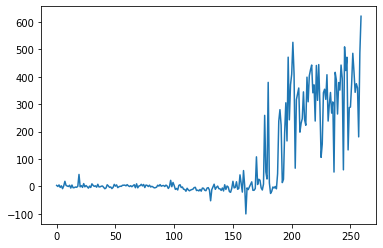



Eps = 0.055 on 9 of 10


Critic Loss = 0.68185.  Mu loss = -30.70609
Critic Loss = 0.46682.  Mu loss = -33.12629
Critic Loss = 1.26150.  Mu loss = -33.92773
Critic Loss = 0.75927.  Mu loss = -34.22882



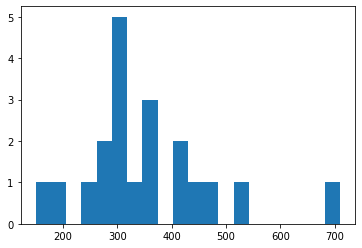

Reward mean,std = 349.904 +/- 121.716


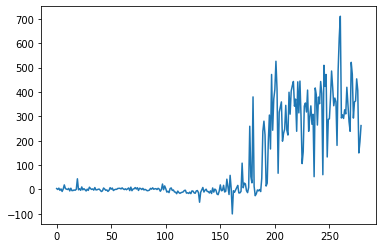



Eps = 0.010 on 10 of 10


Critic Loss = 0.70928.  Mu loss = -38.96382
Critic Loss = 1.23201.  Mu loss = -41.63719
Critic Loss = 0.97213.  Mu loss = -42.76629



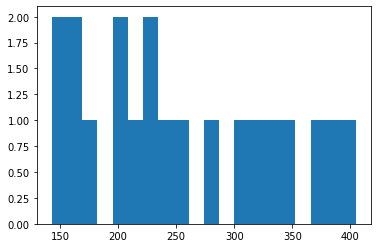

Reward mean,std = 255.584 +/- 81.948


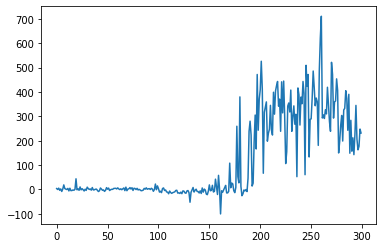

In [6]:
for eps in eps_range(N=10, start=0.9, end=0.01, exp=1.5):
    _ = helpers.rollout_score_dist(learner, eps, n=20)
    viz.plot_q()

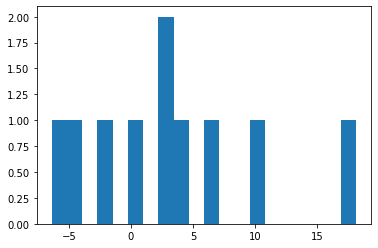

Reward mean,std = 3.162 +/- 6.946


In [7]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=10)

Critic Loss = 1.00481.  Mu loss = -45.07456
Critic Loss = 1.66865.  Mu loss = -45.92110



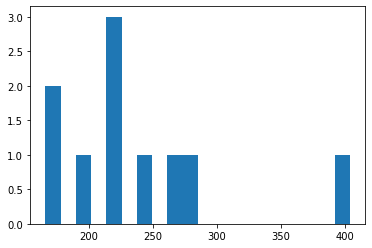

Reward mean,std = 238.647 +/- 64.442


In [8]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=10)

In [9]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%   601.06ms/cyc @     1.0 calls/cyc
              do_learning:  92.8%   557.75ms/cyc @    93.7 calls/cyc
            critic_update:  30.8%   185.02ms/cyc @    90.7 calls/cyc
             actor_update:  21.3%   127.91ms/cyc @    90.7 calls/cyc
             move_targets:  21.0%   126.33ms/cyc @    90.7 calls/cyc
                   sample:  18.6%   111.92ms/cyc @    90.7 calls/cyc
         rollout-forwards:   7.0%    42.24ms/cyc @    94.7 calls/cyc


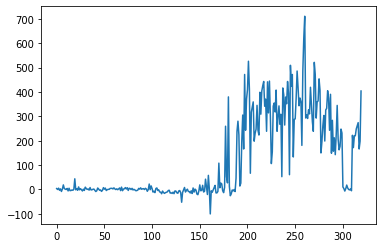

In [10]:
plt.plot(learner.reward_history)

In [11]:
learner.eps=0.0
learner.rollout(render=True)

Creating window glfw


(132, 293.5009390328804)

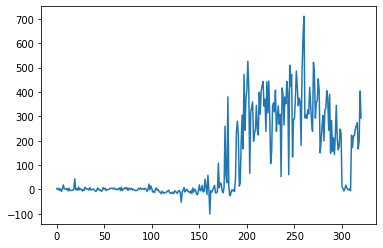

In [12]:
viz.plot_q()